# Cruise data starter code

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

## Read SWIFT wave buoy data
(https://www.apl.washington.edu/project/project.php?id=swift)

In [7]:
SWIFT_FILE_PATH = './data/SWIFT22_02May2024.nc'
swift_data = xr.open_dataset(SWIFT_FILE_PATH)

swift_data

<xarray.Dataset>
Dimensions:                                                               (
                                                                           time: 13,
                                                                           z: 40,
                                                                           zHR: 128,
                                                                           freq: 42)
Coordinates:
  * z                                                                     (z) float64 ...
  * zHR                                                                   (zHR) float64 ...
  * time                                                                  (time) datetime64[ns] ...
  * freq                                                                  (freq) float64 ...
Data variables: (12/29)
    air_pressure                                                          (time) float64 ...
    air_pressure_stddev                                                   (time) float64 ...
    air_temperature                                                       (time) float64 ...
    air_temperature_stddev                                                (time) float64 ...
    drift_direction                                                       (time) float64 ...
    driftdirTstddev                                                       (time) float64 ...
    ...                                                                    ...
    winddirR                                                              (time) float64 ...
    winddirRstddev                                                        (time) float64 ...
    wind_direction                                                        (time) float64 ...
    wind_direction_stddev                                                 (time) float64 ...
    wind_speed                                                            (time) float64 ...
    wind_speed_stddev                                                     (time) float64 ...
Attributes: (12/13)
    creation_date:        02-May-2024 16:02:33
    creator:              Jim Thomson (APL-UW)
    please_acknowledge::  investigator above
    institution:          Applied Physics Laboratory at the University of Was...
    contact_email_1:      jthomson@apl.washington.edu
    id:                   22.0
    ...                   ...
    temporal_sampling:    Data from are ensembles values calculated from 512 ...
    reference1:           Thomson, J., (2012). Wave breaking dissipation obse...
    reference2:           https://github.com/SASlabgroup/SWIFT-codes
    level:                Version 1
    history:              Version 1
    missing_data_flag:    -999

Plot wind speed and wave height.

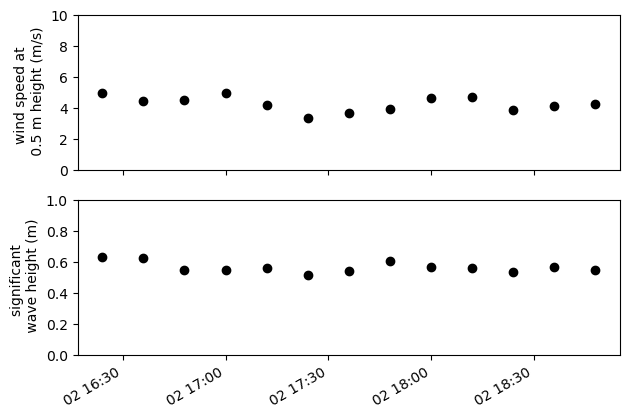

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax[0].scatter(
    swift_data['time'],
    swift_data['wind_speed'],
    color='k',
)
ax[0].set_ylim([0, 10])
ax[0].set_ylabel('wind speed at \n 0.5 m height (m/s)')
ax[1].scatter(
    swift_data['time'],
    swift_data['sea_surface_wave_significant_height'],
    color='k',
)
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('significant \n wave height (m)')
fig.autofmt_xdate()

Plot SWIFT-mounted ADCP currents.

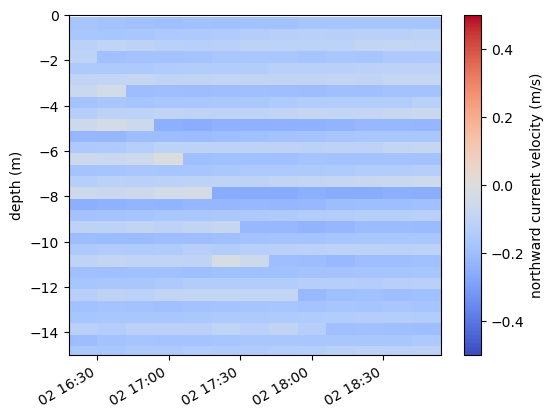

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
pcm = ax.pcolormesh(
    swift_data['time'],
    -swift_data['z'],
    swift_data['north'],
    shading='auto',
    cmap='coolwarm',
    vmin=-0.5,
    vmax=0.5,
)
cbar = plt.colorbar(pcm)
cbar.set_label('northward current velocity (m/s)')
ax.set_ylabel('depth (m)')
ax.set_ylim([-15, 0])
fig.autofmt_xdate()

## Read RBR CTD data

**Note:** reading xlsx files requires the `openpyxl` package.  If you are using Conda, it can be installed with:
``` console
$ conda install openpyxl
```

In [66]:
RBR_CTD_FILE_PATH = './data/RBR_CTD060617_30Apr2024.xlsx'
rbr_ctd_data = pd.read_excel(RBR_CTD_FILE_PATH, sheet_name='Data', skiprows=1)
rbr_ctd_data = rbr_ctd_data.set_index('Time')

rbr_ctd_data

/opt/homebrew/Caskroom/miniconda/base/envs/CEWA590/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Conductivity,Temperature,Pressure,Sea pressure,Depth,Salinity,Specific conductivity,Speed of sound,Density anomaly
Time,,,,,,,,,
2024-04-30 16:39:32.000,32.087821,10.082838,12.764016,2.631516,2.610057,28.864757,44870.011273,1482.721230,22.164949
2024-04-30 16:39:32.042,32.087277,10.084277,12.785275,2.652775,2.631143,28.863061,44867.525746,1482.724772,22.163496
2024-04-30 16:39:32.083,32.089680,10.085805,12.800996,2.668496,2.646735,28.864229,44869.054659,1482.732017,22.164235
2024-04-30 16:39:32.125,32.090385,10.084975,12.821183,2.688683,2.666757,28.865584,44871.036202,1482.730963,22.165515
2024-04-30 16:39:32.167,32.092716,10.084394,12.836344,2.703844,2.681795,28.868361,44874.991886,1482.732457,22.167839
...,...,...,...,...,...,...,...,...,...
2024-04-30 19:54:22.416,0.002703,7.560412,10.171290,0.038790,0.038473,0.004643,4.053471,1437.304487,-0.120059
2024-04-30 19:54:22.458,0.001588,7.550959,10.169661,0.037161,0.036858,0.004087,2.380977,1437.263897,-0.119998
2024-04-30 19:54:22.500,0.001551,7.541465,10.176342,0.043842,0.043484,0.004065,2.326780,1437.223948,-0.119470


Plot the salinity profiles.

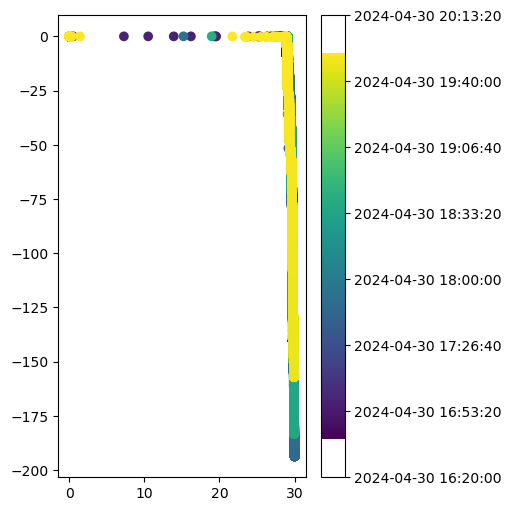

In [169]:
fig, ax = plt.subplots(figsize=(4, 6))
sc = ax.scatter(
    x=rbr_ctd_data['Salinity'],
    y=-rbr_ctd_data['Depth'],
    c=pd.to_numeric(rbr_ctd_data.index),  # use unix timestamp for colormapping
)
cbar = fig.colorbar(sc, ax=ax)
cbar_ticks = cbar.get_ticks()
# Convert the unix timestamps to datetimes for the label.
cbar.set_ticks(
    ticks=cbar_ticks,
    labels=pd.to_datetime(cbar_ticks)
)

Remove CTD data while it is on deck.  You can review the field notes and update these times to be more precise.

In [159]:
start_time = pd.Timestamp('2024-04-30 16:45')
end_time = pd.Timestamp('2024-04-30 18:45')
rbr_ctd_data_subset = rbr_ctd_data[start_time:end_time].query('Depth > 0.25')

Text(0.5, 0, 'Salinity (PSU)')

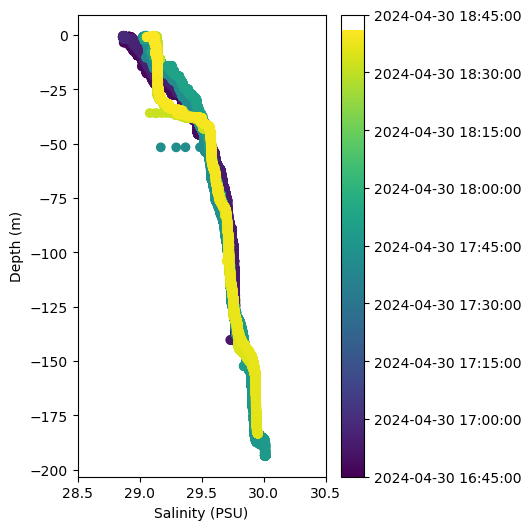

In [170]:
fig, ax = plt.subplots(figsize=(4, 6))
sc = ax.scatter(
    x=rbr_ctd_data_subset['Salinity'],
    y=-rbr_ctd_data_subset['Depth'],
    c=pd.to_numeric(rbr_ctd_data_subset.index),
)
cbar = fig.colorbar(sc, ax=ax)
cbar_ticks = pd.date_range(start_time, end_time, freq='0.25h')
cbar.set_ticks(
    ticks=pd.to_numeric(cbar_ticks),
    labels=pd.to_datetime(cbar_ticks)
)
ax.set_xlim([28.5, 30.5])
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Salinity (PSU)')

## Read Wire Walker RBR data

In [183]:
WW_RBR_FILE_PATH = './data/WW_RBR_30Ap2024.xlsx'
ww_rbr_data = pd.read_excel(WW_RBR_FILE_PATH, sheet_name='Data', skiprows=1)
ww_rbr_data = ww_rbr_data.set_index('Time')

ww_rbr_data

/opt/homebrew/Caskroom/miniconda/base/envs/CEWA590/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Conductivity,Temperature,Pressure,Chlorophyll a,Temperature.1,Dissolved O2 concentration,Sea pressure,Depth,Salinity,Speed of sound,Specific conductivity,Dissolved O2 saturation,Density anomaly
Time,,,,,,,,,,,,,
2024-04-30 09:22:21.938,32.126122,10.088562,11.957911,0.295731,NaN,NaN,1.825412,1.810526,28.898630,1482.769775,44919.605469,NaN,22.186744
2024-04-30 09:22:22.000,32.126064,10.088409,11.939024,0.295731,NaN,NaN,1.806524,1.791793,28.898699,1482.769165,44919.707031,NaN,22.186736
2024-04-30 09:22:22.063,32.127029,10.088074,11.918093,0.295731,NaN,NaN,1.785593,1.771032,28.899944,1482.769043,44921.460938,NaN,22.187664
2024-04-30 09:22:22.125,32.125080,10.087250,11.890918,0.295671,NaN,NaN,1.758418,1.744079,28.898666,1482.764038,44919.726562,NaN,22.186675
2024-04-30 09:22:22.188,32.123737,10.086761,11.875407,0.295731,NaN,NaN,1.742908,1.728695,28.897718,1482.760864,44918.433594,NaN,22.185944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 13:11:55.813,-0.000977,9.397705,10.149868,0.029565,NaN,NaN,0.017368,0.017227,0.000000,1444.870850,-1.392181,NaN,-0.247415
2024-04-30 13:11:55.875,-0.001224,9.401459,10.148494,0.029565,NaN,NaN,0.015994,0.015864,0.000000,1444.885986,-1.743378,NaN,-0.247722
2024-04-30 13:11:55.938,-0.001073,9.399780,10.150311,0.029565,NaN,NaN,0.017812,0.017667,0.000000,1444.879150,-1.527989,NaN,-0.247579


## Read RBR PAR sensor data

In [173]:
RBR_PAR_FILE_PATH = './data/RBR_PARsensor_30Apr2024.xlsx'
rbr_par_data = pd.read_excel(RBR_PAR_FILE_PATH, sheet_name='Data', skiprows=1)
rbr_par_data = rbr_par_data.set_index('Time')

rbr_par_data

/opt/homebrew/Caskroom/miniconda/base/envs/CEWA590/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,PAR
Time,
2024-04-30 14:00:00.000,-0.001002
2024-04-30 14:00:00.500,0.005023
2024-04-30 14:00:01.000,0.010054
2024-04-30 14:00:01.500,-0.002353
2024-04-30 14:00:02.000,0.017430
...,...
2024-04-30 21:30:14.500,9.916235
2024-04-30 21:30:15.000,9.935148
2024-04-30 21:30:15.500,9.849148


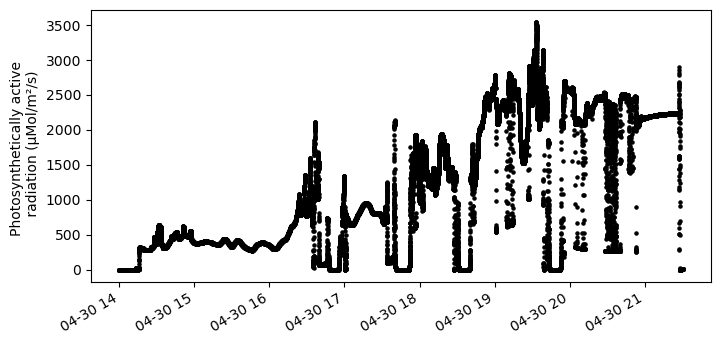

In [182]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(
    rbr_par_data.index,
    rbr_par_data['PAR'],
    s=5,
    color='k',
)
ax.set_ylabel('Photosynthetically active \n radiation (µMol/m²/s)')
fig.autofmt_xdate()